In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_RAW='data/raw'
DATASET_NAME='digital_marketing_campaign_dataset.csv'

### Loading dataset

In [3]:
raw_df = pd.read_csv(os.path.join(DATA_RAW,DATASET_NAME))
raw_df.head()

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

  AdvertisingPlatform AdvertisingTool  Conversion  
0            IsConfid      ToolConfid           1  
1            IsConfid      ToolConfid           1  
2            IsConfid      ToolConfid           1  
3            IsConfid      ToolConfid           1  
4            IsConfid      ToolConfid           1

### Checking datatypes and number of unique values

In [4]:
pd.concat([raw_df.dtypes,raw_df.iloc[0],raw_df.nunique()], axis=1, keys=['Type','Value', 'Number of unique'])

Type         Value  Number of unique
CustomerID             int64          8000              8000
Age                    int64            56                52
Gender                object        Female                 2
Income                 int64        136912              7789
CampaignChannel       object  Social Media                 5
CampaignType          object     Awareness                 4
AdSpend              float64   6497.870068              8000
ClickThroughRate     float64      0.043919              8000
ConversionRate       float64      0.088031              8000
WebsiteVisits          int64             0                50
PagesPerVisit        float64      2.399017              8000
TimeOnSite           float64      7.396803              8000
SocialShares           int64            19               100
EmailOpens             int64             6                20
EmailClicks            int64             9                10
PreviousPurchases      int64             4                10
LoyaltyPoints          int64           688              3983
AdvertisingPlatform   object      IsConfid                 1
AdvertisingTool       object    ToolConfid                 1
Conversion             int64             1                 2

In [5]:
raw_df = raw_df.drop(columns=['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool']) #drop id column and columns with only one value

### Checking missing values

In [6]:
raw_df.isna().sum()

Age                  0
Gender               0
Income               0
CampaignChannel      0
CampaignType         0
AdSpend              0
ClickThroughRate     0
ConversionRate       0
WebsiteVisits        0
PagesPerVisit        0
TimeOnSite           0
SocialShares         0
EmailOpens           0
EmailClicks          0
PreviousPurchases    0
LoyaltyPoints        0
Conversion           0
dtype: int64

### Checking duplicated values

In [7]:
raw_df.duplicated().sum()

0

### Checking general statistics

In [8]:
raw_df.describe()

Age         Income      AdSpend  ClickThroughRate  \
count  8000.000000    8000.000000  8000.000000       8000.000000   
mean     43.625500   84664.196750  5000.944830          0.154829   
std      14.902785   37580.387945  2838.038153          0.084007   
min      18.000000   20014.000000   100.054813          0.010005   
25%      31.000000   51744.500000  2523.221165          0.082635   
50%      43.000000   84926.500000  5013.440044          0.154505   
75%      56.000000  116815.750000  7407.989369          0.228207   
max      69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269       2.607358     4.228218   
min          0.010018       0.000000       1.000428     0.501669   
25%          0.056410      13.000000       3.302479     4.068340   
50%          0.104046      25.000000       5.534257     7.682956   
75%          0.152077      37.000000       7.835756    11.481468   
max          0.199995      49.000000       9.999055    14.995311   

       SocialShares   EmailOpens  EmailClicks  PreviousPurchases  \
count   8000.000000  8000.000000  8000.000000        8000.000000   
mean      49.799750     9.476875     4.467375           4.485500   
std       28.901165     5.711111     2.856564           2.888093   
min        0.000000     0.000000     0.000000           0.000000   
25%       25.000000     5.000000     2.000000           2.000000   
50%       50.000000     9.000000     4.000000           4.000000   
75%       75.000000    14.000000     7.000000           7.000000   
max       99.000000    19.000000     9.000000           9.000000   

       LoyaltyPoints   Conversion  
count    8000.000000  8000.000000  
mean     2490.268500     0.876500  
std      1429.527162     0.329031  
min         0.000000     0.000000  
25%      1254.750000     1.000000  
50%      2497.000000     1.000000  
75%      3702.250000     1.000000  
max      4999.000000     1.000000

In [9]:
raw_df.head()

Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0   56  Female  136912    Social Media    Awareness  6497.870068   
1   69    Male   41760           Email    Retention  3898.668606   
2   46  Female   88456             PPC    Awareness  1546.429596   
3   32  Female   44085             PPC   Conversion   539.525936   
4   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

   Conversion  
0           1  
1           1  
2           1  
3           1  
4           1

### Numerical and catecorigal information

In [10]:
numerical = raw_df.dtypes.index[raw_df.dtypes!='object']
categorical = raw_df.dtypes.index[raw_df.dtypes=='object']
print(f'We have {len(numerical)} numerical features: {numerical}')
print(f'We have {len(categorical)} categorical features: {categorical}')

We have 14 numerical features: Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Conversion'],
      dtype='object')
We have 3 categorical features: Index(['Gender', 'CampaignChannel', 'CampaignType'], dtype='object')


In [11]:
codes_unique={}
for column in categorical:
    print(f"Categories in {column}: ")
    print(raw_df[column].value_counts())
    print('-------')

Categories in Gender: 
Gender
Female    4839
Male      3161
Name: count, dtype: int64
-------
Categories in CampaignChannel: 
CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64
-------
Categories in CampaignType: 
CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64
-------


### Visualisation

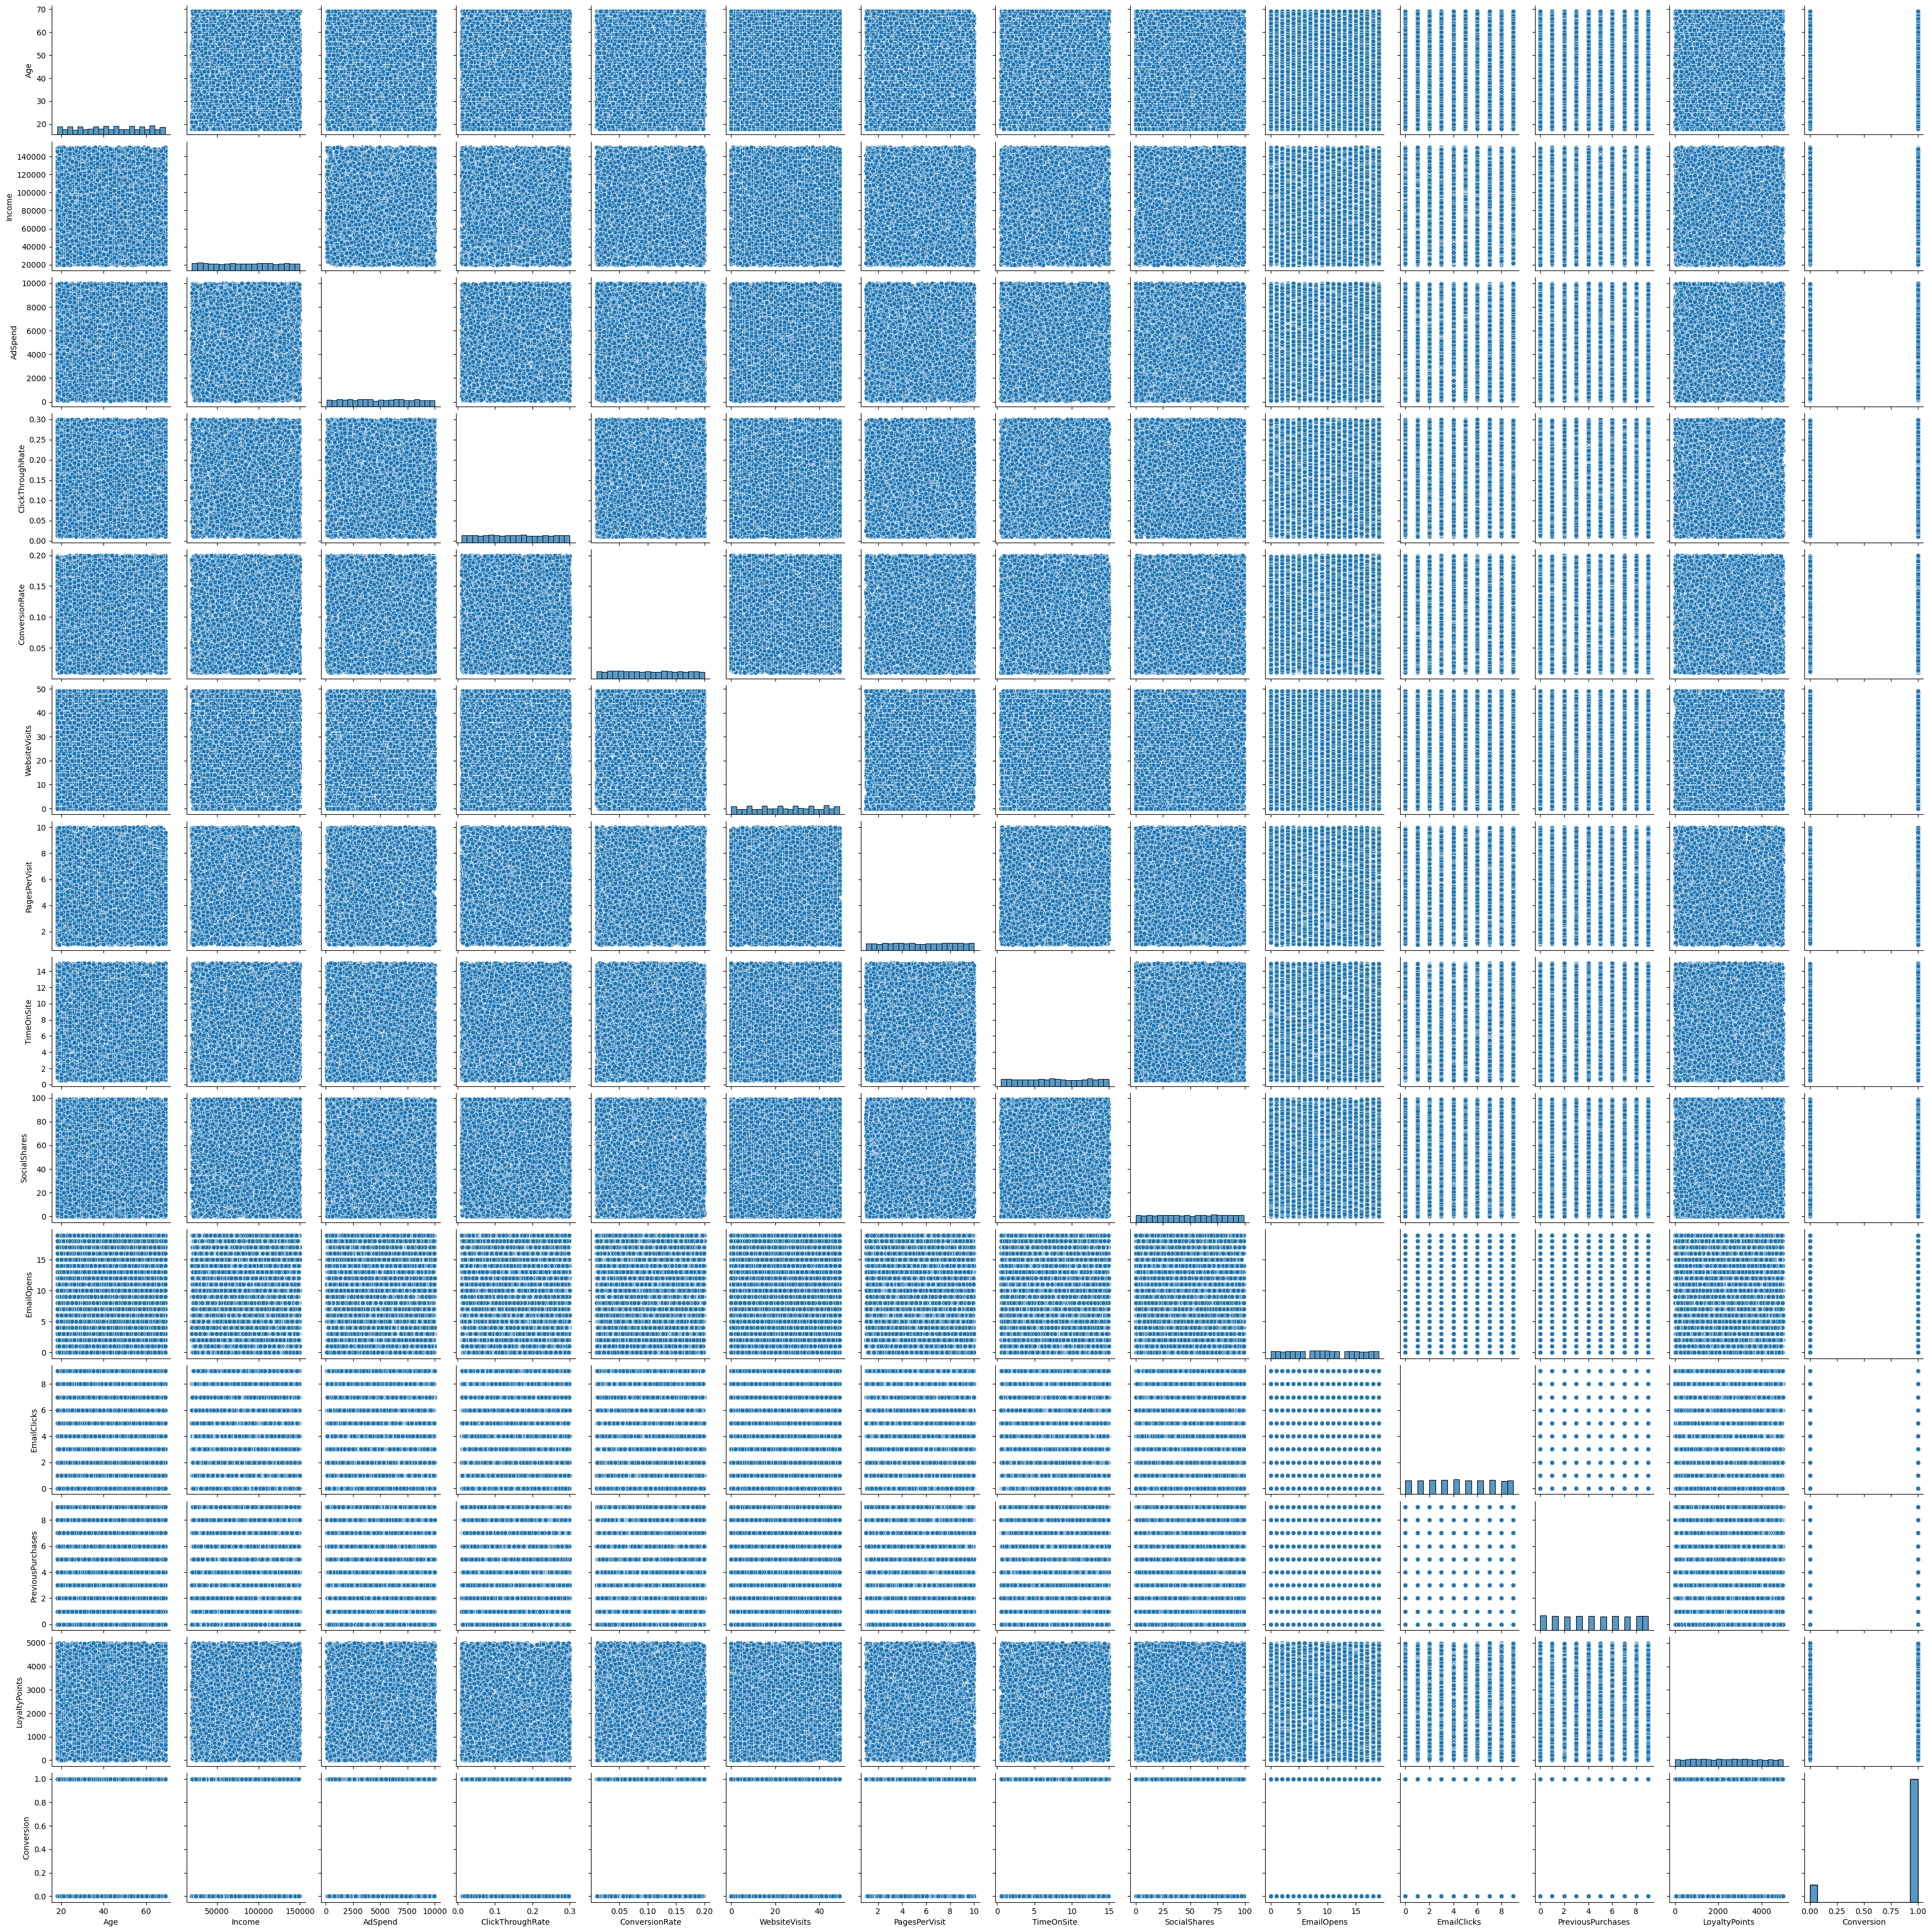

In [12]:
sns.pairplot(raw_df)
plt.show()

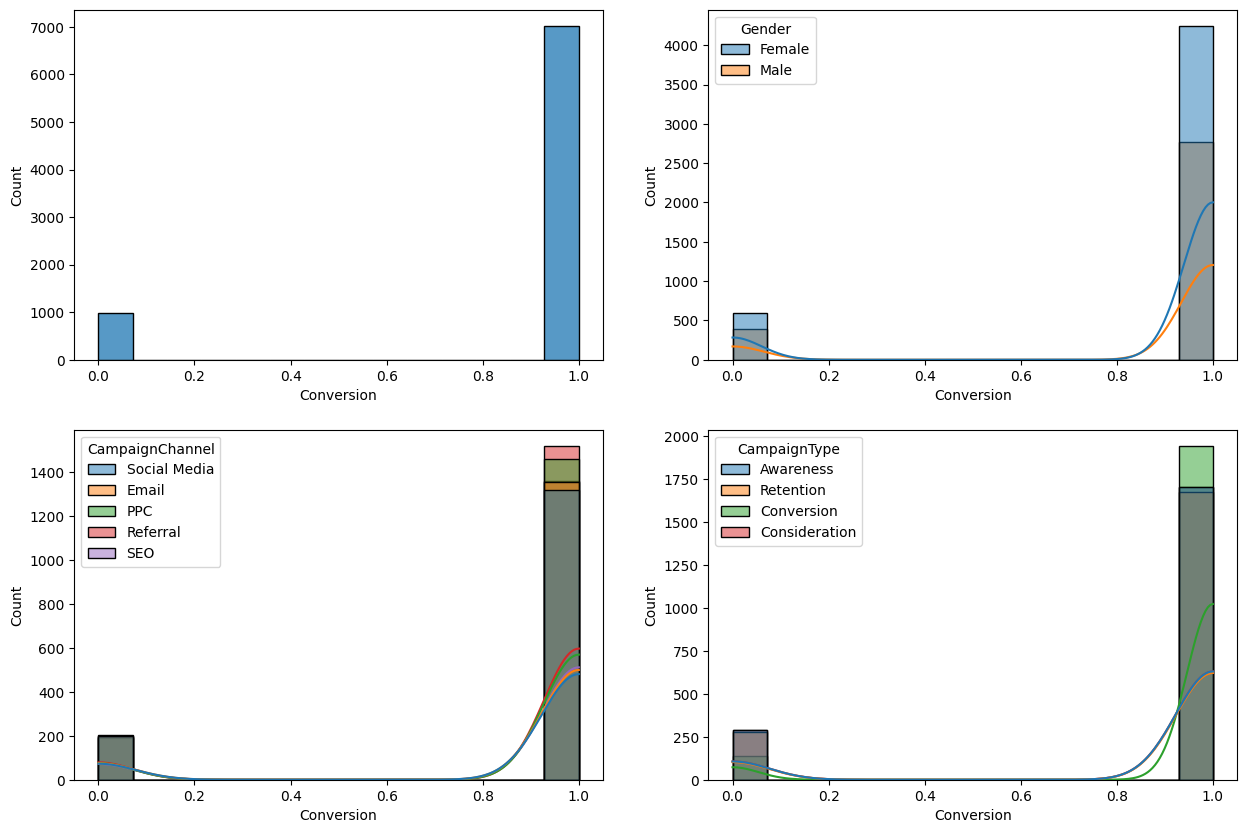

In [13]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
plt.subplot(221)
sns.histplot(data=raw_df, x='Conversion')
plt.subplot(222)
sns.histplot(data=raw_df, x='Conversion', kde=True, hue='Gender')
plt.subplot(223)
sns.histplot(data=raw_df, x='Conversion', kde=True, hue='CampaignChannel')
plt.subplot(224)
sns.histplot(data=raw_df, x='Conversion', kde=True, hue='CampaignType')
plt.show()

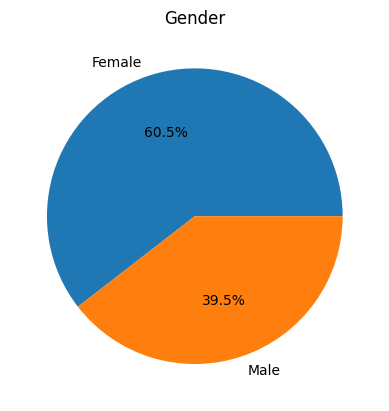

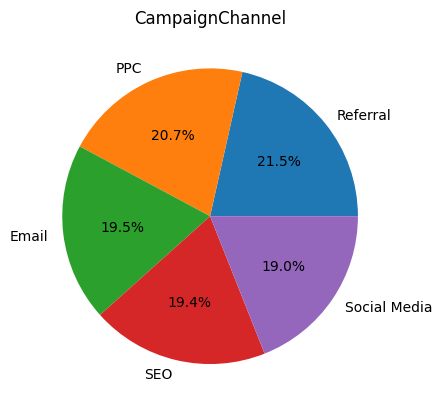

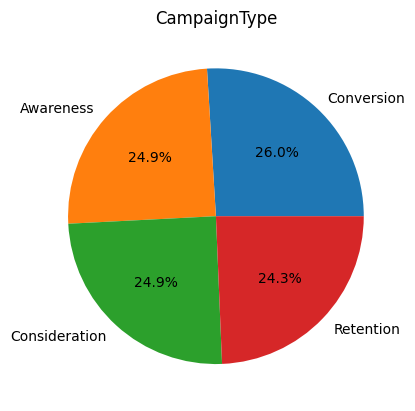

In [14]:
for column in categorical:
    val_counts = raw_df[column].value_counts()
    plt.pie(val_counts,
            labels=raw_df[column].value_counts().keys(),
            autopct='%.1f%%')
    plt.title(column)
    plt.show()

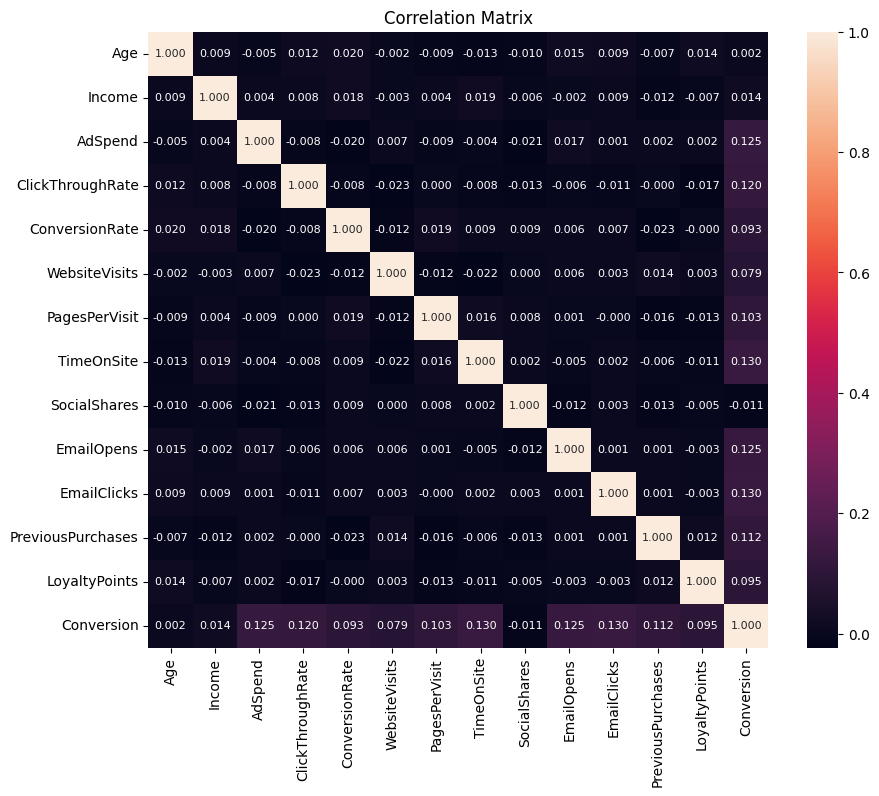

In [15]:
corr = raw_df[numerical].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True,
            annot_kws = {'fontsize':8},
            fmt='.3f')
plt.title('Correlation Matrix')
plt.show()

In [16]:
raw_df.to_csv('../data/eda/digital_marketing_campaign_dataset.csv', index=False)